# Functions, derivatives, and plots thereof
This notebook uses sympy for plotting the functions together with their analytically calculated derivatives. It also gives you the results of the calculation on latex format.

https://docs.sympy.org/latest/tutorial/calculus.html

https://www.tutorialspoint.com/sympy/sympy_plotting.htm

https://docs.sympy.org/latest/modules/plotting.html#plotgrid-class

In [1]:
from sympy import *
import matplotlib.pyplot as plt
init_session()
init_printing(use_unicode=True)

import seaborn as sns
sns.set()
sns.set_style("whitegrid", {'grid.linestyle': '--'})

from IPython.display import display, Math, Latex

# remove/comment line below to get plots in a seperate window
%matplotlib inline

IPython console for SymPy 1.6.1 (Python 3.8.3-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.1/



In [2]:
def plotSympyFunctions(functions, xrange, variable=x):
    npoints=1000
    xvalues=np.arange(xrange[0], xrange[1], (xrange[1]-xrange[0])/npoints)
    fig    = plt.figure(figsize=(10,6))
    for fc in functions:
        name= "$" + latex(fc,order='rev-lex') + "$"
        lfc = lambdify(variable, fc)
        plt.plot(xvalues, lfc(xvalues), label= name)
    plt.legend()
    plt.show()

def TaylorSeries(stringFct, nderiv=5, xrange=(-3,3), x0=0, variable=x, optLatex=False):
    fc    = [None]*(nderiv+1)  # fc[n] = nth derivative of stringFct
    pl    = [None]*(nderiv+1)  # plot of fc[n]
    
    nstr="f"
    taylor=symbols('T', cls=Function)(variable)
    taylor=sympify('0')
    nfac=1
    for n in range(nderiv+1):
        if n==0: 
            fc[n] = sympify(stringFct).simplify()
        else:
            fc[n] = (diff(fc[n-1])).factor().simplify()
            nfac *= n

        taylor += fc[n].subs(x,x0).simplify()*(x-x0)**n/nfac
        
    string = "\( " + latex(fc[0]) + " \\approx " + latex(taylor,order='rev-lex') + " +\\mathcal{O}(x^{" + str(n+1) + "}) \)"
    display(Latex(string))
    if optLatex:
        print(string)
        
    plotSympyFunctions((fc[0], taylor), xrange)


<IPython.core.display.Latex object>

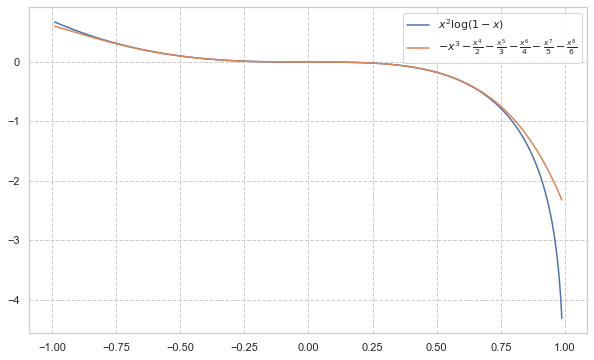

In [3]:
TaylorSeries("x**2 * ln(1-x)", 8, x0=0, xrange=(-0.99,0.99))

<IPython.core.display.Latex object>

\( x \sqrt{x + 1} \approx x + \frac{x^{2}}{2} - \frac{x^{3}}{8} + \frac{x^{4}}{16} - \frac{5 x^{5}}{128} + \frac{7 x^{6}}{256} +\mathcal{O}(x^{7}) \)


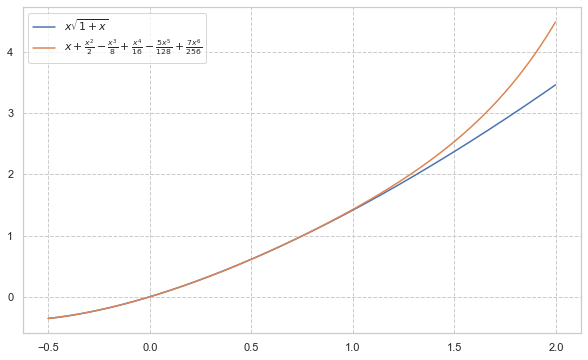

In [4]:
TaylorSeries("x*sqrt(1+x)", 6, xrange=(-0.5, 2), optLatex=true)

<IPython.core.display.Latex object>

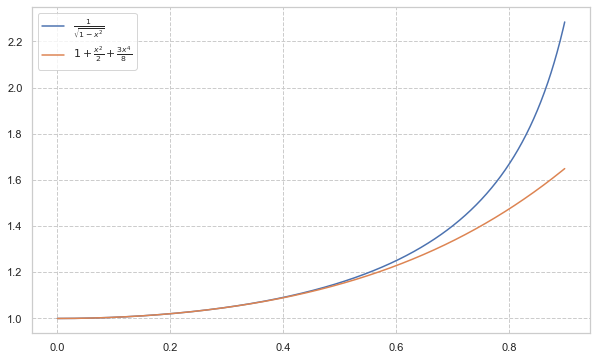

In [5]:
TaylorSeries("1/sqrt(1-x**2)", xrange=(0, 0.9))

<IPython.core.display.Latex object>

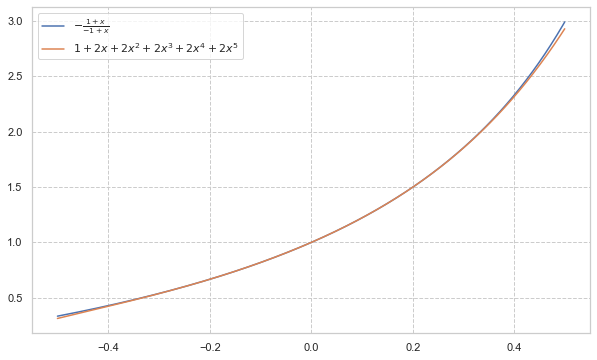

In [6]:
TaylorSeries("(1+x)/(1-x)", nderiv=5, xrange=(-0.5, 0.5))

<IPython.core.display.Latex object>

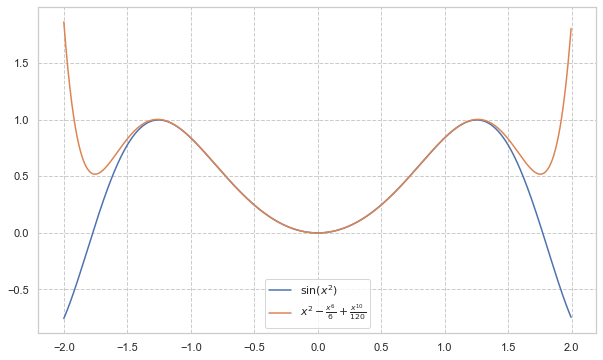

In [7]:
TaylorSeries("sin(x**2)", nderiv=10, xrange=(-2, 2))

<IPython.core.display.Latex object>

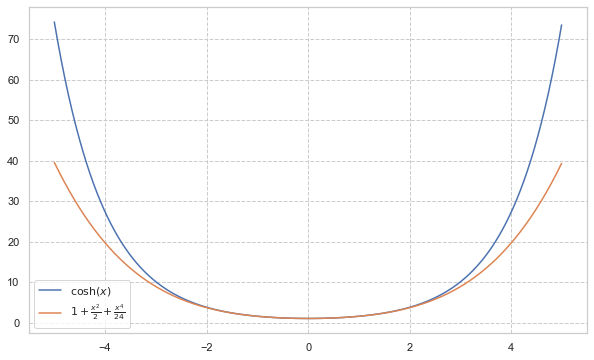

In [8]:
TaylorSeries("cosh(x)", nderiv=5, xrange=(-5, 5))

<IPython.core.display.Latex object>

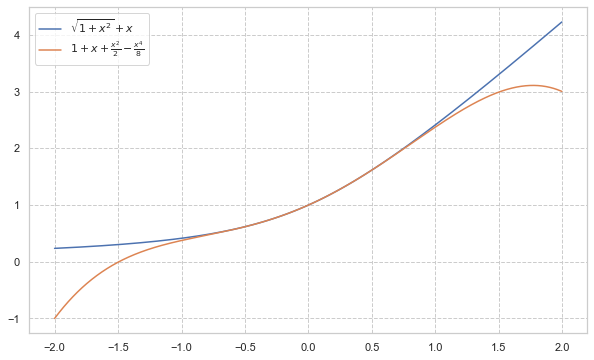

In [9]:
TaylorSeries("x+sqrt(1+x**2)", nderiv=5, xrange=(-2, 2))

<IPython.core.display.Latex object>

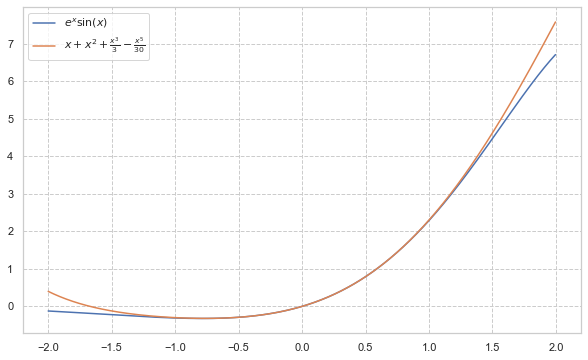

In [10]:
TaylorSeries("exp(x)*sin(x)", nderiv=5, xrange=(-2, 2))

<IPython.core.display.Latex object>

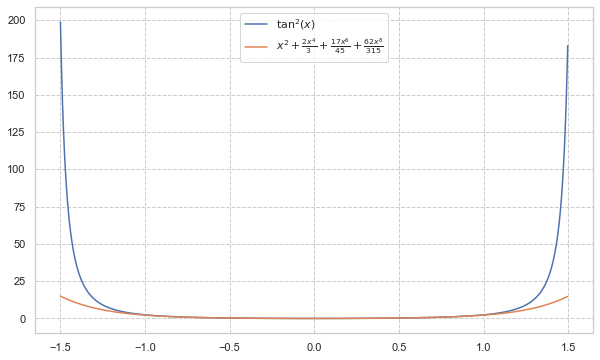

In [11]:
TaylorSeries("tan(x)**2", nderiv=8, xrange=(-1.5, 1.5))

<IPython.core.display.Latex object>

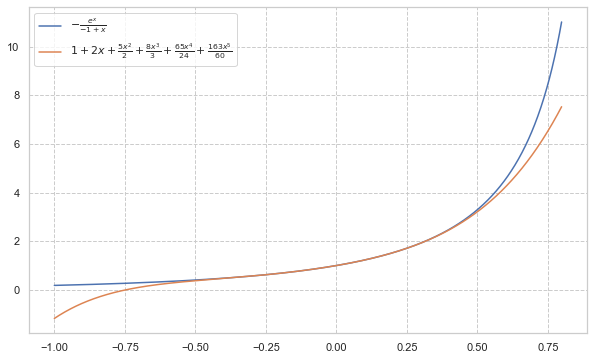

In [12]:
TaylorSeries("exp(x)/(1-x)", nderiv=5, xrange=(-1, 0.8))

<IPython.core.display.Latex object>

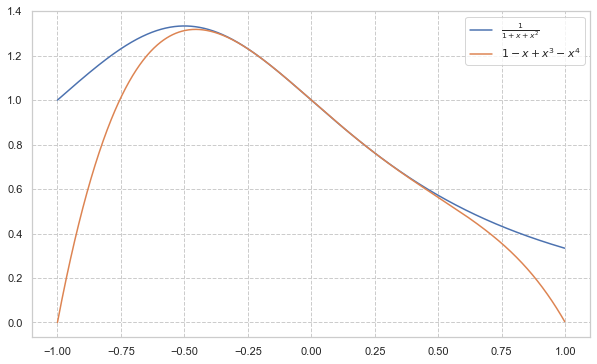

In [13]:
TaylorSeries("1/(1 + x + x**2)", nderiv=5, xrange=(-1, 1))

<IPython.core.display.Latex object>

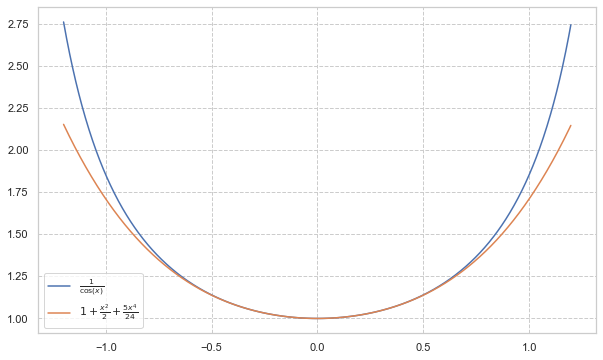

In [14]:
TaylorSeries("1/cos(x)", nderiv=5, xrange=(-1.2, 1.2))